In [34]:
%matplotlib inline
import pandas as pd
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [51]:
ground_truth = [0, 1, 0, 0 , 1, 0, 0, 0, 0, 1, 1, 0, 0]
retrievad = [0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]

In [52]:
df = pd.DataFrame({"GT": ground_truth, "RETRIEVED": retrievad})
df["RELEVANT"] = df.GT == df.RETRIEVED

In [53]:
df.groupby(['RELEVANT']).size()

RELEVANT
False     3
True     10
dtype: int64

In [54]:
df

,GT,RETRIEVED,RELEVANT
0,0,0,True
1,1,1,True
2,0,0,True
3,0,0,True
4,1,0,False
5,0,0,True
6,0,1,False
7,0,0,True
8,0,0,True
9,1,0,False


In [55]:
cnf = confusion_matrix(ground_truth, retrievad)

In [56]:
tn, fp, fn, tp = confusion_matrix(ground_truth, retrievad).ravel()
tn, fp, fn, tp

(8, 1, 2, 2)

In [57]:
def precision(cnf):
    tn, fp, fn, tp = cnf.ravel()
    return float(tp)/float(tp+fp)

def recall(cnf):
    tn, fp, fn, tp = cnf.ravel()
    return float(tp)/float(tp+fn)

In [58]:
precision(cnf), recall(cnf)

(0.6666666666666666, 0.5)

In [31]:
ls_precision = []
ls_recall = []
ls_k = []
for i in range(1,12):
    try:
        print(i)
        cnf = confusion_matrix(ground_truth[:i], retrievad[:i])
        ls_precision.append(precision(cnf))
        ls_recall.append(recall(cnf))
        ls_k.append(i)
    except ZeroDivisionError as e:
        print(cnf.ravel())
    print("="*10)

1
[0 0 1 0]
2
[1 0 1 0]
3
4
5
6
7
8
9
10
11


In [32]:
df_metric = pd.DataFrame({"@K":ls_k, "PRECISION": ls_precision, "RECALL": ls_recall})

In [33]:
df_metric

,@K,PRECISION,RECALL
0,3,1.000000,0.500000
1,4,1.000000,0.666667
2,5,1.000000,0.666667
3,6,1.000000,0.500000
4,7,0.666667,0.500000
5,8,0.750000,0.600000
6,9,0.800000,0.666667
7,10,0.833333,0.714286
8,11,0.833333,0.714286


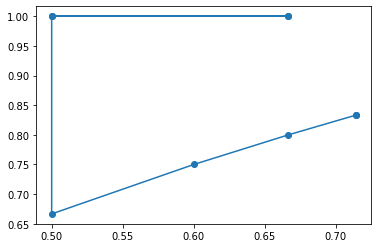

In [39]:
plt.plot(df_metric.RECALL.values, df_metric.PRECISION.values, '-o')

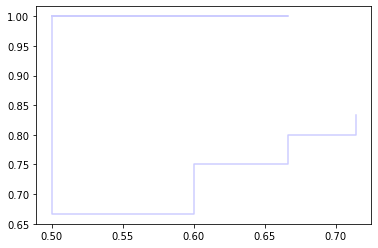

In [47]:
plt.step(df_metric.RECALL.values, df_metric.PRECISION.values, color='b', alpha=0.2,
         where='post')

In [41]:
from sklearn.metrics import precision_recall_curve

In [43]:
precision, recall, _ = precision_recall_curve(ground_truth, retrievad)

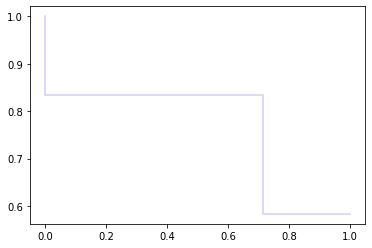

In [49]:
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')

Signature:
precision_recall_curve(
    y_true,
    probas_pred,
    pos_label=None,
    sample_weight=None,
)
Source:   
def precision_recall_curve(y_true, probas_pred, pos_label=None,
                           sample_weight=None):
    """Compute precision-recall pairs for different probability thresholds

    Note: this implementation is restricted to the binary classification task.

    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.

    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.

    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold.  T